# Data Wrangling
Data wrangling is a process of `cleaning`, `tranforming`, and `organinzing` data so that it can be used for `analysis and visulization`. It is an important step in data analysis process because raw data is often `incomplete`, `inconsistant`, and in an `unstructured format`, which can make it difficult to work with. 

- Data wrangling helps to make the data `consistent`, `accurate`, and `useful` for analysis and decision making. 

In [173]:
# liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [174]:
df = sns.load_dataset('titanic')

In [175]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [176]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [178]:
# assesing the data
df.isnull().sum()/ len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [179]:
df.drop(columns=['deck'], inplace=True)

In [180]:
print(df.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [181]:
# dealinng with missing values
# jahan age ke column me missing values hai wahan pe mean se fill kar do
df['age'] = df['age'].fillna(value= df['age'].mean())

In [182]:
df.isnull().sum()/ len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [183]:
# categorical variable me missing values hai wahan pe mode se fill kar do
df['embarked'] = df['embarked'].fillna(value= df['embarked'].mode()[0])

In [184]:
df.isnull().sum()/ len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [185]:
df['embark_town'] = df['embark_town'].fillna(value= df['embark_town'].mode()[0])

In [186]:
df.isnull().sum()/ len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outliers removal
 ## visulization wala method

<Axes: xlabel='sex', ylabel='age'>

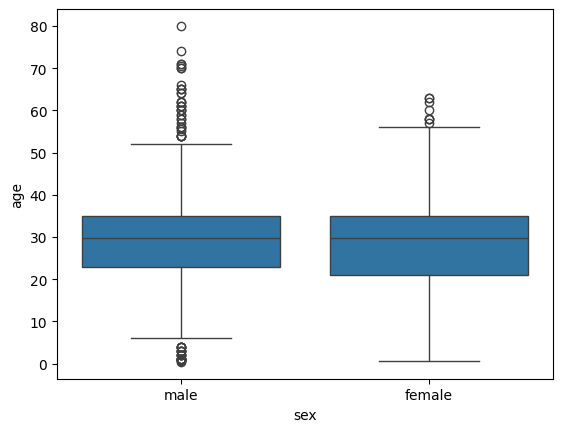

In [187]:
import seaborn as sns
sns.boxplot(y='age', x ='sex', data=df)

# IQR method

In [188]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(13.0)

In [189]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [190]:
df.shape, df_clean.shape

((891, 14), (825, 14))

In [191]:
891-825

66

In [192]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [193]:
df.shape, df_clean.shape

((891, 14), (735, 14))

In [194]:
825-735

90

<Axes: xlabel='age', ylabel='Count'>

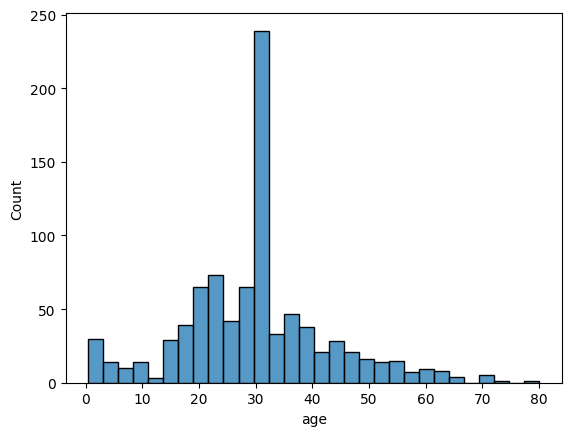

In [195]:
sns.histplot(data=df, x='age')

# z score method

In [196]:
# pip install scipy
from scipy import stats
import numpy as np

# zscore = np.sbs(stats.zscore(df['age']))
# threshold = 3
# outliers = np.where(zscore > threshold).allaxes[0]
# outliers

# Finding and Droping duplicates

In [197]:
df = df_clean
df.shape,  df_clean.shape

((735, 14), (735, 14))

In [198]:
735-638

97

In [199]:
df.duplicated().sum()

np.int64(97)

In [200]:
df_duplicates = df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


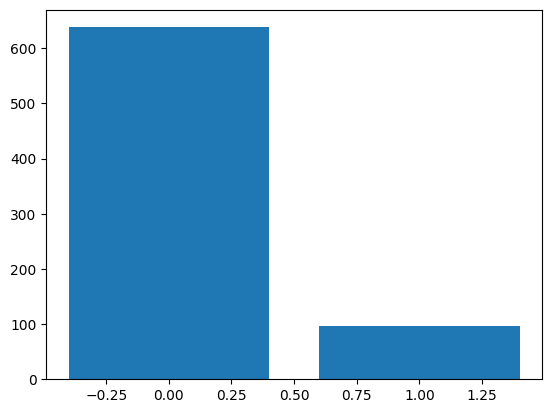

In [201]:
df_duplicates = df.duplicated()
df_duplicates_count = df_duplicates.value_counts()
plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.show()

In [202]:
df.drop_duplicates(inplace=True)

In [203]:
df.shape

(638, 14)

# Data Normalization

In [204]:
# pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# data
df

# select columns to normalize
columns_to_normalize = ['age', 'fare']

# create the scaler funtion/tool
scaler = MinMaxScaler()

# fit and transfrom the data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,0.354232,2.476489,0.357003,0.490596,0.390282,0.281026
std,0.478655,0.727512,0.170218,0.955397,0.842195,0.241201
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.258608,0.000000,0.000000,0.079110
50%,0.000000,3.000000,0.367921,0.000000,0.000000,0.183091
75%,1.000000,3.000000,0.434531,1.000000,0.000000,0.447925
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


age or fare ke columns ko aik scale  (scale 0 se 1 ke darmian)

In [205]:
# pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler

# data
df

# select columns to normalize
columns_to_normalize = ['age', 'fare']

# create the scaler funtion/tool
scaler = StandardScaler()

# fit and transfrom the data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,638.000000,638.000000,6.380000e+02,638.000000,638.000000,6.380000e+02
mean,0.354232,2.476489,-3.786591e-16,0.490596,0.390282,-4.454813e-17
std,0.478655,0.727512,1.000785e+00,0.955397,0.842195,1.000785e+00
min,0.000000,1.000000,-2.098979e+00,0.000000,0.000000,-1.166026e+00
25%,0.000000,2.000000,-5.785088e-01,0.000000,0.000000,-8.377858e-01
50%,0.000000,3.000000,6.419022e-02,0.000000,0.000000,-4.063475e-01
75%,1.000000,3.000000,4.558244e-01,1.000000,0.000000,6.924921e-01
max,1.000000,3.000000,3.780467e+00,5.000000,6.000000,2.983150e+00


Range of StandardScaler (There is NO fixed range).

Unlike Min-Max scaling, StandardScaler does NOT bound values.

Typical distribution:

Most values fall between -3 and +3 (if data is roughly normal)

But values can exceed this range

# log transformation

In [206]:
kashti = sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [172]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
import numpy as np
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

kashti['age'] = np.log(kashti['age']) 
kashti['fare'] = np.log(kashti['fare']) 